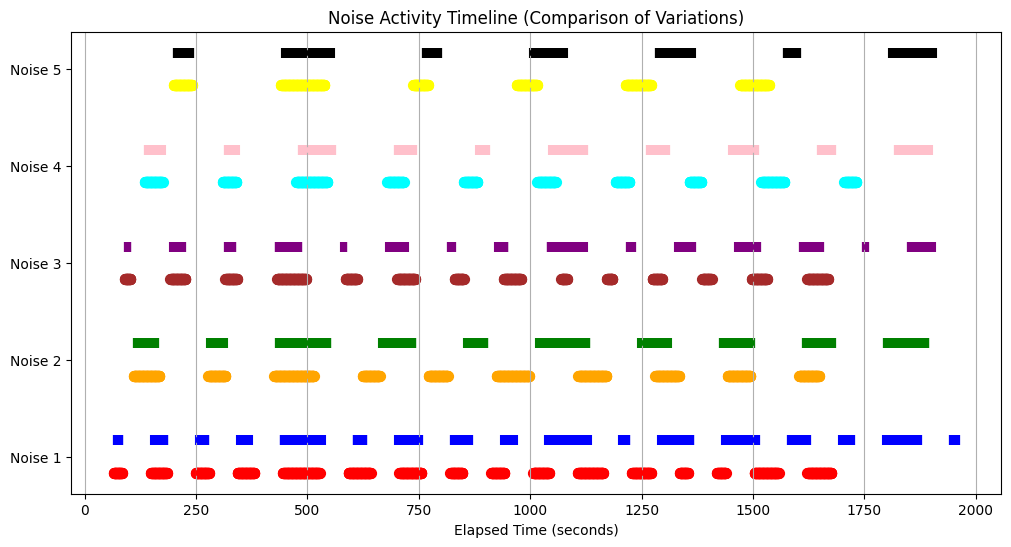

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

def parse_log(file_path):
    """ Parse a log file with structure 'seconds:bandwidth' and extract elapsed time and bitrates. """
    intervals = []
    bitrates = []
    elapsed_time = 0.0

    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split(":")
            if len(parts) == 2:
                duration = float(parts[0])
                bitrate = float(parts[1])
                elapsed_time += duration
                intervals.append(elapsed_time)
                bitrates.append(bitrate)

    return intervals, bitrates

def plot_gantt_chart(data_pairs, noise_labels, colors, linestyles):
    """ Overlapping Gantt Chart for Noise Variations with Better Visibility """
    plt.figure(figsize=(12, 6))

    for i, ((data1, data2), label, (color1, color2), (ls1, ls2)) in enumerate(zip(data_pairs, noise_labels, colors, linestyles)):
        elapsed_time1 = 0
        elapsed_time2 = 0
        y_offset = i * 0.6  # Small vertical offset for better clarity

        # First variation (solid color)
        for duration, bitrate in zip(*data1):
            if bitrate > 0:
                plt.hlines(y=y_offset + 0.1, xmin=elapsed_time1, xmax=duration, colors=color1, linestyles=ls1, linewidth=4)
                plt.scatter([elapsed_time1, duration], [y_offset + 0.1] * 2, color=color1, marker="|", s=50)  # Add markers
            elapsed_time1 = duration

        # Second variation (dashed color)
        for duration, bitrate in zip(*data2):
            if bitrate > 0:
                plt.hlines(y=y_offset - 0.1, xmin=elapsed_time2, xmax=duration, colors=color2, linestyles=ls2, linewidth=4)
                plt.scatter([elapsed_time2, duration], [y_offset - 0.1] * 2, color=color2, marker="o", s=50)  # Add markers
            elapsed_time2 = duration

    plt.title("Noise Activity Timeline (Comparison of Variations)")
    plt.xlabel("Elapsed Time (seconds)")
    plt.yticks([i * 0.6 for i in range(len(noise_labels))], noise_labels)  # Adjust y-ticks to match offsets
    plt.grid(True, axis='x')

    plt.show()

if __name__ == "__main__":
    # Pair log files for comparison of variations of the same noise
    log_file_pairs = [
        (("s1.1.txt", "1.txt"), "Noise 1"),
        (("s1.2.txt", "2.txt"), "Noise 2"),
        (("s1.3.txt", "3.txt"), "Noise 3"),
        (("s2.1.txt", "4.txt"), "Noise 4"),
        (("s2.2.txt", "5.txt"), "Noise 5"),
    ]

    # Use **distinct colors** for each variation instead of similar shades
    color_pairs = [
        ("blue", "red"),
        ("green", "orange"),
        ("purple", "brown"),
        ("pink", "cyan"),
        ("black", "yellow"),
    ]

    # Define distinct line styles for variations
    linestyle_pairs = [
        ("solid", "dashed"),
        ("solid", "dashed"),
        ("solid", "dashed"),
        ("solid", "dashed"),
        ("solid", "dashed"),
    ]

    data_pairs = [(parse_log(file1), parse_log(file2)) for (file1, file2), _ in log_file_pairs]
    noise_labels = [label for _, label in log_file_pairs]

    plot_gantt_chart(data_pairs, noise_labels, color_pairs, linestyle_pairs)